In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

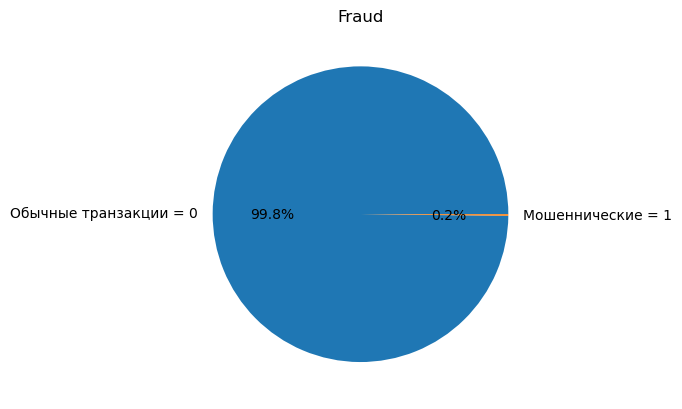

In [9]:
values = df['Class'].value_counts().to_numpy()
labels = ['Обычные транзакции = 0', 'Мошеннические = 1']

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Fraud')
plt.show()

датасет люто не сбалансирован. посмотрим распределение Amount и Time

C:\Users\A\AppData\Local\Temp\ipykernel_13000\2851709941.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'], hist=True, kde=True,
C:\Users\A\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Amount', ylabel='Density'>

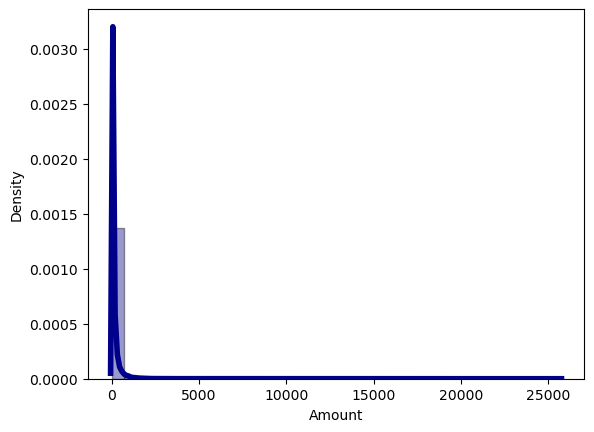

In [10]:
sns.distplot(df['Amount'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\A\AppData\Local\Temp\ipykernel_13000\3205800539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], hist=True, kde=True,
C:\Users\A\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Time', ylabel='Density'>

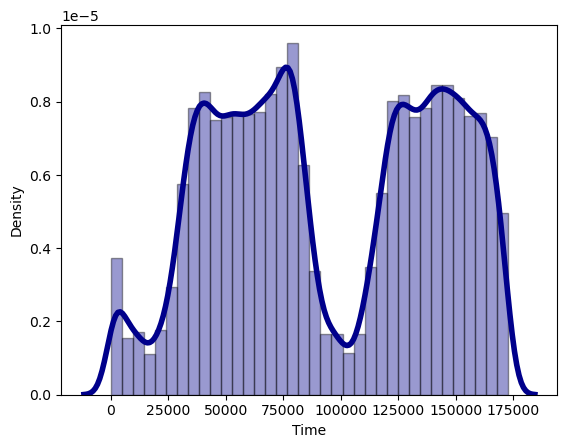

In [11]:
sns.distplot(df['Time'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

надо масштабировать эти признаки как и остальные. С StandardScaler время ближе к -2, что очень много, а также amount в минусе. RobustScaler смог уменьшить экстримальные величины, поэтому оставил его

In [12]:
raw_features = ['Time', 'Amount']
pca_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
all_features = pca_features + raw_features

In [13]:
#предобработка чисто Time и Amount
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', RobustScaler(), raw_features)
    ],
    remainder='passthrough' #pca признаки остаются как есть
)

In [14]:
pipe = Pipeline(
    [
        ('preprocess', preprocessor),
        ('classifier', LogisticRegression()) #заглушка. GSCV подставит нужное
])

param_grid = [
    {
        'classifier': [LogisticRegression(max_iter=10000)],
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['lbfgs']
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7]
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20, 30, 40, 50]
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [3, 5, None]
    }
]
    

In [14]:
X = df[all_features]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2018)

In [32]:
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scale',
                                                                         RobustScaler(),
                                                                         ['Time',
                                                                          'Amount'])])),
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(max_iter=10000)],
                          'classifier__C': [0.1, 1, 10],
                          'classifier__solver': ['lbfgs']},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [3, 5, 7]},
                         {'classifier': [DecisionTreeClassifier()],
                          'classifier__max_depth': [None, 10, 20, 30, 40, 50]},
                         {'classifier': [RandomForestClassifier(n_estimators=50)],
                          'classifier__max_depth': [3, 5, None],
                          'classifier__n_estimators': [50, 100]}])

In [33]:
print("Best model:", grid.best_estimator_)
print("Best params:", grid.best_params_)
print("Test accuracy:", grid.score(X_test, y_test))

Best model: Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', RobustScaler(),
                                                  ['Time', 'Amount'])])),
                ('classifier', RandomForestClassifier(n_estimators=50))])
Best params: {'classifier': RandomForestClassifier(n_estimators=50), 'classifier__max_depth': None, 'classifier__n_estimators': 50}
Test accuracy: 0.9995259997893332


далее пробую с надстройкой dask. если я, конечно, правильно понял что это из хабр статьи

In [78]:
pip install dask[complete] dask-ml


INFO: pip is looking at multiple versions of dask-ml to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/149.8 kB ? eta -:--:--
   ----- --------------------------------- 20.5/149.8 kB 640.0 kB/s eta 0:00:01
   ---------- ---------------------------- 41.0/149.8 kB 487.6 kB/s eta 0:00:01
   ------------------------------- ------ 122.9/149.8 kB 901.1 kB/s eta 0:00:01
   -------------------------------------- 149.8/149.8 kB 889.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/259.4 kB ? eta -:--:--
   ------------------ --------------------- 122.9/259.4 kB 7.5 MB/s eta 0:00:01
   ---------------------------------------  256.0/259.4 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 259.4/259.4 kB 2.3 MB/s eta 0:00:00


In [15]:
import joblib

In [18]:
pipe = Pipeline(
    [
        ('preprocess', preprocessor),
        ('classifier', LogisticRegression()) #заглушка. GSCV подставит нужное
])

param_grid = [
    {
        'classifier': [LogisticRegression(max_iter=10000)],
        'classifier__penalty': ['none', 'l2'],
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['lbfgs']
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7]
    },
    {
        'classifier': [LinearSVC(dual=False)],
        'classifier__penalty': ['l1'],
        'classifier__C': [0.1, 1, 10]
    },
    {
        'classifier': [LinearSVC()],
        'classifier__penalty': ['l2'],
        'classifier__C': [0.1, 1, 10]
    }
]

In [19]:
from joblib import parallel_backend
from dask.distributed import Client

client = Client()

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
with parallel_backend('dask'):
    grid.fit(X_train, y_train)

C:\Users\A\anaconda3\Lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 51451 instead
  warnings.warn(


In [20]:
print("Best model:", grid.best_estimator_)
print("Best params:", grid.best_params_)
print("Test accuracy:", grid.score(X_test, y_test))

Best model: Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', RobustScaler(),
                                                  ['Time', 'Amount'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])
Best params: {'classifier': KNeighborsClassifier(n_neighbors=3), 'classifier__n_neighbors': 3}
Test accuracy: 0.9995259997893332
